In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
from scipy import stats
from scipy.optimize import curve_fit
import uncertainties
import scipy.constants as constants

In [78]:
df=pd.read_csv("Screw_calibration.csv")
df["Uncert Ringcount"]=1*np.ones(10) #uncertainty of the Ringcounts
df["Uncert Distance"]=0.01*np.ones(10)*constants.inch #smallest readable distance
df[" Distance"]=df[" Distance"]*constants.inch #converting to meters
df

,Measurement,Ringcount,Distance,Uncert Ringcount,Uncert Distance
0,1,20,0.176022,1.0,0.000254
1,2,21,0.174244,1.0,0.000254
2,3,22,0.172466,1.0,0.000254
3,4,23,0.170688,1.0,0.000254
4,5,24,0.168910,1.0,0.000254
5,6,25,0.166878,1.0,0.000254
6,7,26,0.164846,1.0,0.000254
7,8,27,0.162560,1.0,0.000254
8,9,28,0.160528,1.0,0.000254
9,10,29,0.158242,1.0,0.000254


In [54]:
distance_start=7*constants.inch
distance_screw=[]
for i in range(len(df[" Distance"])):
    if i==0:
        distance_screw.append(distance_start-df[" Distance"][i])
    else:
        distance_screw.append(abs(df[" Distance"][i]-df[" Distance"][i-1]))
distance_screw=np.array(distance_screw)


#Uncertainties
dist_screw_uncert=np.sqrt(2*0.01**2)*np.ones(10) #inch
dist_screw_uncert=dist_screw_uncert*constants.inch

distance_screw #distance in meters

array([0.001778, 0.001778, 0.001778, 0.001778, 0.001778, 0.002032,
       0.002032, 0.002286, 0.002032, 0.002286])

$d_m = m \frac{\lambda_0}{2}$
But here we have a number of Ringes that we went through, which means a number of whole $\lambda$-s, hence we get the same pattern as before after the movement


In [92]:
lambda_0=632.8E-9 #m
distance_wavelength=df[" Ringcount"]*lambda_0
distance_wavelength=np.array(distance_wavelength)
distance_wavelength #m
dist_wave_uncert=lambda_0*np.ones(10)/2

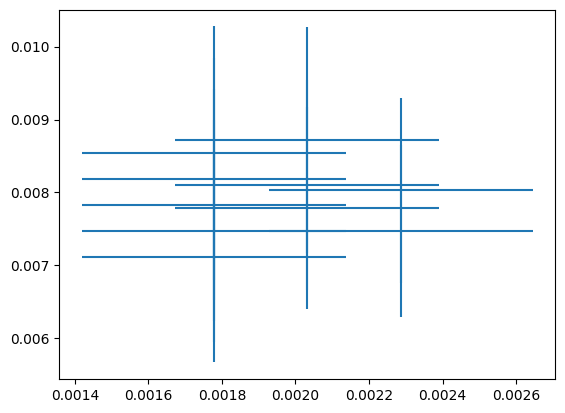

[0.001778 0.001778 0.001778 0.001778 0.001778 0.002032 0.002032 0.002286
 0.002032 0.002286]
[0.00711811 0.00747402 0.00782992 0.00818583 0.00854173 0.00778543
 0.00809685 0.00747402 0.00871969 0.00802765]


In [95]:
y=distance_wavelength/distance_screw
y_err=np.sqrt((dist_wave_uncert/distance_screw)**2 + (distance_wavelength*dist_screw_uncert/distance_screw**2)**2)
x=distance_screw
plt.errorbar(x, y, yerr=y_err, xerr=dist_screw_uncert, fmt='None')
plt.show()
print(x)
print(y)

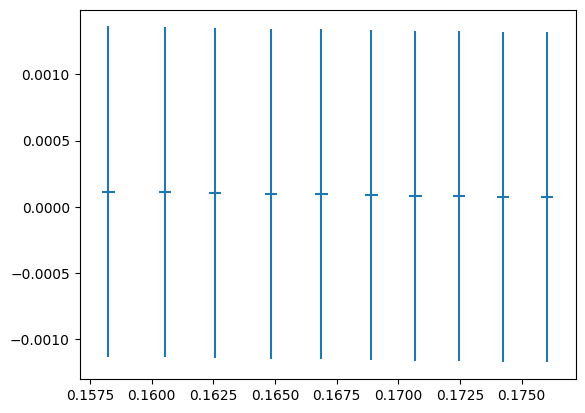

In [94]:
y=distance_wavelength/df[" Distance"]
y_err=np.sqrt((dist_wave_uncert/df["Uncert Distance"])**2 + (distance_wavelength*df["Uncert Distance"]/df[" Distance"]**2)**2)

x=df[" Distance"]
plt.errorbar(x, y, yerr=y_err, xerr=df["Uncert Distance"], fmt='None')
plt.show()